<a href="https://colab.research.google.com/github/AshwinChellappan/AshwinChellappan/blob/main/Imageclassification_Deep%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [3]:
#Importing dependencies
import keras
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras import datasets, layers, models
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import regularizers
from keras.layers import BatchNormalization
import numpy as np

# **EDA (Exploratory Data Analysis)**

In [4]:
(train_X,train_Y),(test_X,test_Y)=cifar10.load_data()
# Checking the number of rows (records) and columns (features)
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [6]:
# Checking the number of unique classes 
print(np.unique(train_Y))
print(np.unique(test_Y))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [7]:
# Creating a list of all the class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

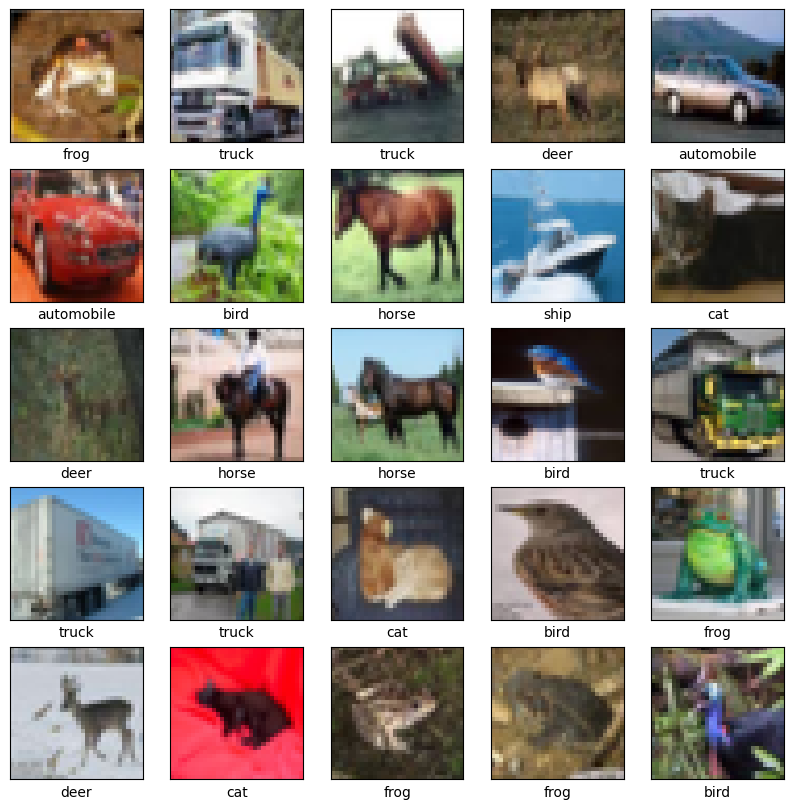

In [8]:
# Visualizing some of the images from the training dataset
plt.figure(figsize=[10,10])
for i in range (25):    # for first 25 images
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_X[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_Y[i][0]])

plt.show()

### **Data Preprocessing**

In [6]:
# Converting the pixels data to float type
train_x=train_X.astype('float32')
test_X=test_X.astype('float32')
# Standardizing (255 is the total number of pixels an image can have)
train_X=train_X/255.0
test_X=test_X/255.0
num_classes=10
train_labels = np_utils.to_categorical(train_Y, num_classes)
test_labels = np_utils.to_categorical(test_Y, num_classes)

# Building the CNN Model using Keras

Below models contains various layers stacked on top of each other. The output of one layer feeds into the input of the next layer.

Conv2D layers are convolutions. Each filter (32 in the first two convolution layers ) transforms a part of the image. The transformation is applied on the whole image

MaxPool2D is a downsampling filter. It reduces a 2x2 matrix of the image to a single pixel with the maximum value of the 2x2 matrix. The filter aims to conserve the main features of the image while reducing the size

Dropout is a regularization layer. In our model, 25% of the nodes in the layer are randomly ignores, allowing the network to learn different features. This prevents overfitting

**relu** is the rectifier, and it is used to find nonlinearity in the data. It works by returning the input value if the input value >= 0. If the input is negative, it returns 0

Flatten converts the tensors into a 1D vector

The Dense layers are an artificial neural network (ANN). The last layer returns the probability that an image is in each class (one for each digit)

As this model aims to categorize the images, we will use a categorical_crossentropy loss function

## Model 1 - Baseline Model

In [23]:
Baselinemodel = Sequential()
Baselinemodel.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
Baselinemodel.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
Baselinemodel.add(MaxPooling2D((2, 2)))
Baselinemodel.add(Flatten())
Baselinemodel.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
Baselinemodel.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(lr=0.001, momentum=0.9)
Baselinemodel.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [24]:
Baselinemodel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               1048704   
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                      

In [26]:
historyBase=Baselinemodel.fit(train_X, train_labels, validation_data=(test_X, test_labels),epochs=10,batch_size=64)

Epoch 1/10
782/782 [==============================] - 106s 135ms/step - loss: 1.7518 - accuracy: 0.3809 - val_loss: 1.5245 - val_accuracy: 0.4579
Epoch 2/10
782/782 [==============================] - 105s 134ms/step - loss: 1.4240 - accuracy: 0.4942 - val_loss: 1.3447 - val_accuracy: 0.5226
Epoch 3/10
782/782 [==============================] - 104s 133ms/step - loss: 1.2745 - accuracy: 0.5501 - val_loss: 1.2261 - val_accuracy: 0.5696
Epoch 4/10
782/782 [==============================] - 106s 135ms/step - loss: 1.1707 - accuracy: 0.5897 - val_loss: 1.1616 - val_accuracy: 0.5954
Epoch 5/10
782/782 [==============================] - 105s 134ms/step - loss: 1.0906 - accuracy: 0.6189 - val_loss: 1.1116 - val_accuracy: 0.6042
Epoch 6/10
782/782 [==============================] - 105s 134ms/step - loss: 1.0167 - accuracy: 0.6459 - val_loss: 1.0793 - val_accuracy: 0.6214
Epoch 7/10
782/782 [==============================] - 105s 134ms/step - loss: 0.9542 - accuracy: 0.6681 - val_loss: 1.0534 -

In [28]:
_,acc=Baselinemodel.evaluate(test_X,test_labels)
print(acc*100)

313/313 [==============================] - 6s 18ms/step - loss: 0.9624 - accuracy: 0.6677
66.76999926567078


# Model 2 - Building using SGD optimizer

In [34]:
modelSGD=Sequential()
modelSGD.add(Conv2D(32,(3,3),input_shape=(32,32,3),
    padding='same',activation='relu',
    kernel_constraint=maxnorm(3)))
modelSGD.add(Dropout(0.2))
modelSGD.add(Conv2D(32,(3,3),activation='relu',padding='same',kernel_constraint=maxnorm(3)))
modelSGD.add(MaxPooling2D(pool_size=(2,2)))
modelSGD.add(Flatten())
modelSGD.add(Dense(512,activation='relu',kernel_constraint=maxnorm(3)))
modelSGD.add(Dropout(0.5))
modelSGD.add(Dense(num_classes, activation='softmax'))

In [35]:
sgd=SGD(lr=0.01,momentum=0.9,decay=(0.01/25),nesterov=False)
modelSGD.compile(loss='categorical_crossentropy',
  optimizer=sgd,
  metrics=['accuracy'])

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [41]:
modelSGD.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 dropout_4 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               4194816   
                                                      

In [50]:
modelSGD.fit(train_X,train_labels,epochs=10,batch_size=32,validation_data=(test_X,test_labels))

In [16]:
_,acc=model.evaluate(test_X,test_Y)
print(acc*100)

313/313 [==============================] - 7s 22ms/step - loss: 0.9198 - accuracy: 0.6826
68.26000213623047


In [66]:
pred = model.predict(test_X)
print(pred)

# Converting the predictions into label index 
pred_classes = np.argmax(pred, axis=1)
print(pred_classes)

313/313 [==============================] - 14s 46ms/step
[[0.08920915 0.02029006 0.06032288 ... 0.12588353 0.04782532 0.10169571]
 [0.10114188 0.00385141 0.0200148  ... 0.47315818 0.10345238 0.03188521]
 [0.06290396 0.00434028 0.03730737 ... 0.41238582 0.10884473 0.04197279]
 ...
 [0.22543883 0.04330173 0.04443229 ... 0.18998845 0.036489   0.06388337]
 [0.17466861 0.02738361 0.06343814 ... 0.2825815  0.07966458 0.09260155]
 [0.07668374 0.01026285 0.06618394 ... 0.32822865 0.02427532 0.05186866]]
[3 7 7 ... 6 7 3]


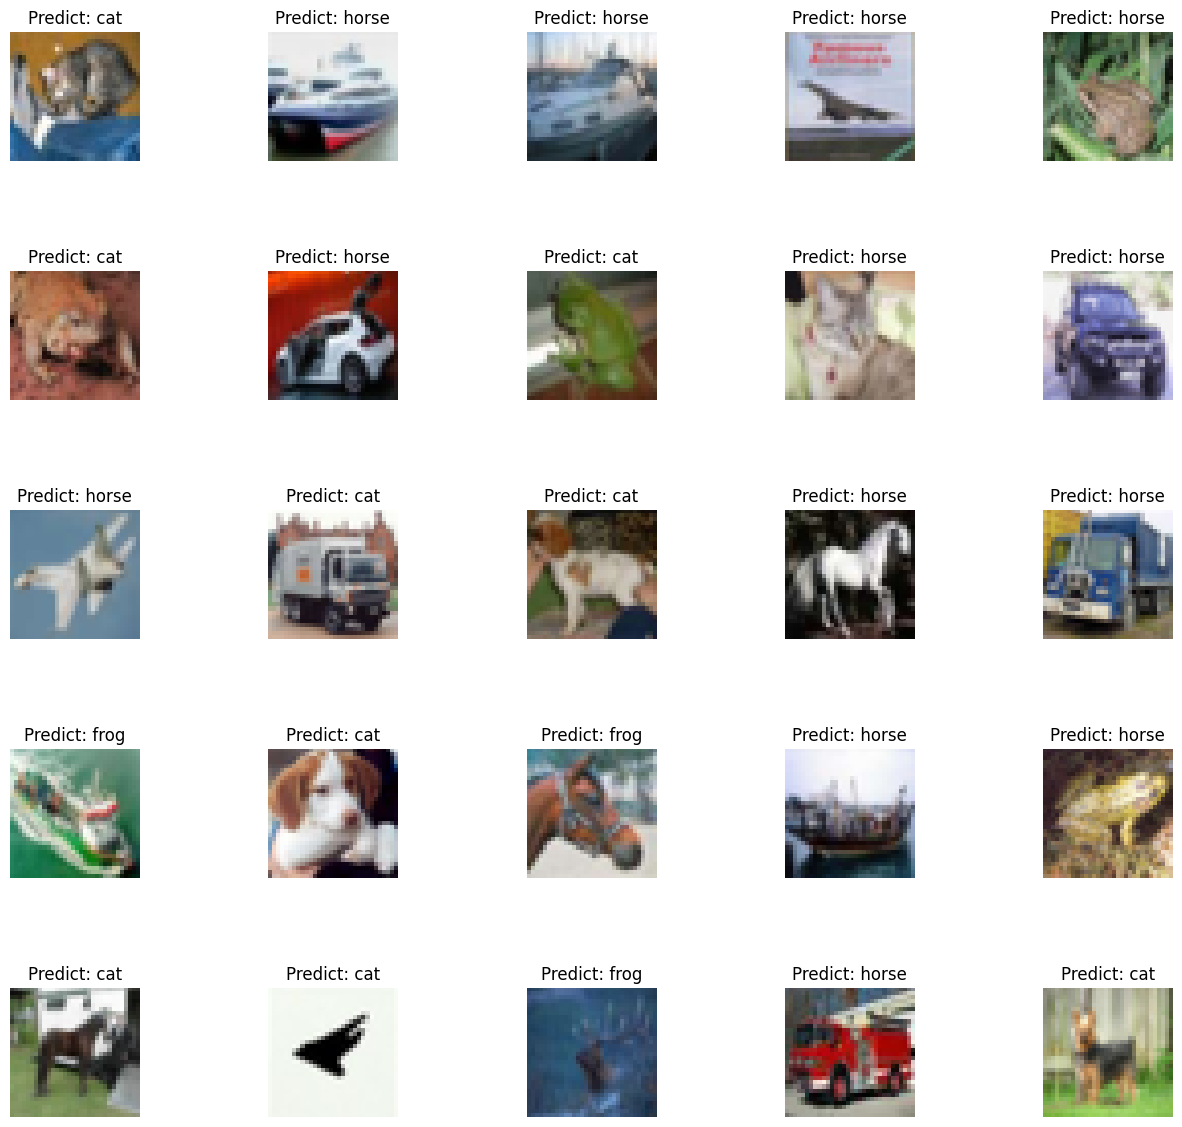

In [67]:
# Plotting the Actual vs. Predicted results

fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(test_X[i])
    axes[i].set_title("Predict: %s" % (class_names[pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

# Model 3 - Building using 'adam' Optimizer

In [7]:
# Creating a sequential model and adding layers to it

model1 = Sequential()

model1.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model1.add(layers.BatchNormalization())
model1.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model1.add(layers.BatchNormalization())
model1.add(layers.MaxPooling2D(pool_size=(2,2)))
model1.add(layers.Dropout(0.3))

model1.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model1.add(layers.BatchNormalization())
model1.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model1.add(layers.BatchNormalization())
model1.add(layers.MaxPooling2D(pool_size=(2,2)))
model1.add(layers.Dropout(0.5))

model1.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model1.add(layers.BatchNormalization())
model1.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model1.add(layers.BatchNormalization())
model1.add(layers.MaxPooling2D(pool_size=(2,2)))
model1.add(layers.Dropout(0.5))

model1.add(layers.Flatten())
model1.add(layers.Dense(128, activation='relu'))
model1.add(layers.BatchNormalization())
model1.add(layers.Dropout(0.5))
model1.add(layers.Dense(num_classes, activation='softmax'))    # num_classes = 10

# Checking the model summary
model1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

**Compiling the Model**


*   Optimizer used during Back Propagation for weight and bias adjustment - Adam (adjusts the learning rate adaptively).
*   Loss Function used - Categorical Crossentropy (used when multiple categories/classes are present).
*   Metrics used for evaluation - Accuracy.






In [8]:
model1.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

**Fitting the Model**
*   Batch Size is used for Adam optimizer
*   Epochs - One epoch is one complete cycle (forward pass + backward pass)



In [10]:
#history = model1.fit(train_X, train_labels, batch_size=64, epochs=20,validation_data=(test_X, test_labels))
history = model1.fit(train_X, train_labels, validation_data=(test_X, test_labels),epochs=20,batch_size=64)

Epoch 1/20
782/782 [==============================] - 334s 428ms/step - loss: 1.5938 - accuracy: 0.4319 - val_loss: 1.3015 - val_accuracy: 0.5225
Epoch 2/20
782/782 [==============================] - 328s 420ms/step - loss: 1.1291 - accuracy: 0.5991 - val_loss: 1.0054 - val_accuracy: 0.6429
Epoch 3/20
782/782 [==============================] - 315s 402ms/step - loss: 0.9664 - accuracy: 0.6611 - val_loss: 0.8175 - val_accuracy: 0.7139
Epoch 4/20
782/782 [==============================] - 317s 405ms/step - loss: 0.8710 - accuracy: 0.6979 - val_loss: 0.8768 - val_accuracy: 0.6899
Epoch 5/20
782/782 [==============================] - 317s 405ms/step - loss: 0.7986 - accuracy: 0.7234 - val_loss: 0.9236 - val_accuracy: 0.6863
Epoch 6/20
782/782 [==============================] - 312s 399ms/step - loss: 0.7422 - accuracy: 0.7455 - val_loss: 0.6648 - val_accuracy: 0.7678
Epoch 7/20
782/782 [==============================] - 314s 402ms/step - loss: 0.7006 - accuracy: 0.7581 - val_loss: 0.6815 -

Text(0.5, 1.0, 'Loss Curves')

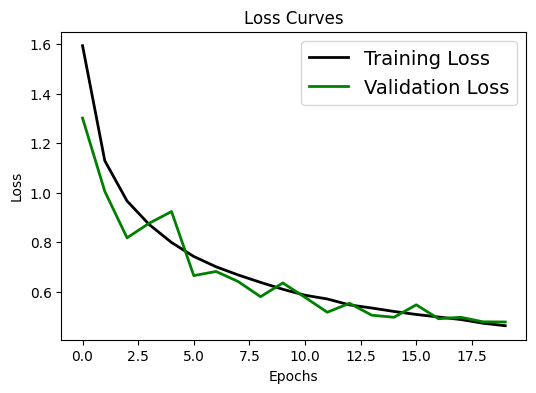

In [11]:
# Loss curve
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

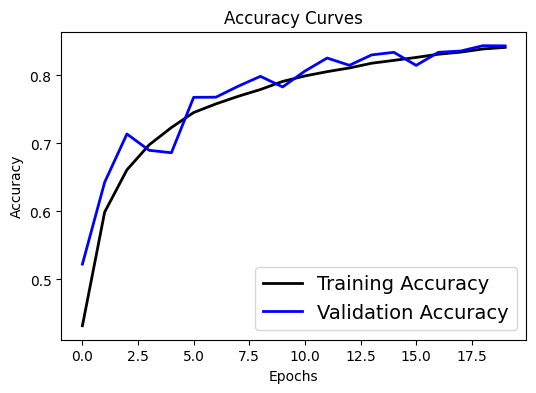

In [12]:
# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

In [13]:
# Making the Predictions
pred = model1.predict(test_X)
print(pred)

# Converting the predictions into label index 
pred_classes = np.argmax(pred, axis=1)
print(pred_classes)

313/313 [==============================] - 14s 44ms/step
[[1.3473487e-03 2.1921768e-04 8.4752515e-03 ... 2.3948500e-04
  7.5171396e-05 1.3537498e-04]
 [8.5119909e-04 5.2373707e-03 1.2693233e-07 ... 4.4468571e-09
  9.9388409e-01 2.7037922e-05]
 [3.8892068e-03 2.5928022e-02 1.7867809e-04 ... 6.6432658e-05
  9.6925360e-01 3.5802036e-04]
 ...
 [1.5414589e-06 1.2705211e-06 6.3432468e-04 ... 2.7760898e-04
  3.0726753e-06 3.0936635e-06]
 [1.2865518e-03 9.9820274e-01 9.8165210e-06 ... 2.7562123e-06
  9.4931580e-05 2.9894675e-04]
 [9.4642646e-06 1.6210715e-06 1.8845234e-05 ... 9.9825531e-01
  3.9243776e-07 1.5117125e-06]]
[3 8 8 ... 5 1 7]


In [15]:
_,acc=model1.evaluate(test_X,test_labels)
print(acc*100)

313/313 [==============================] - 14s 46ms/step - loss: 0.4774 - accuracy: 0.8435
84.3500018119812


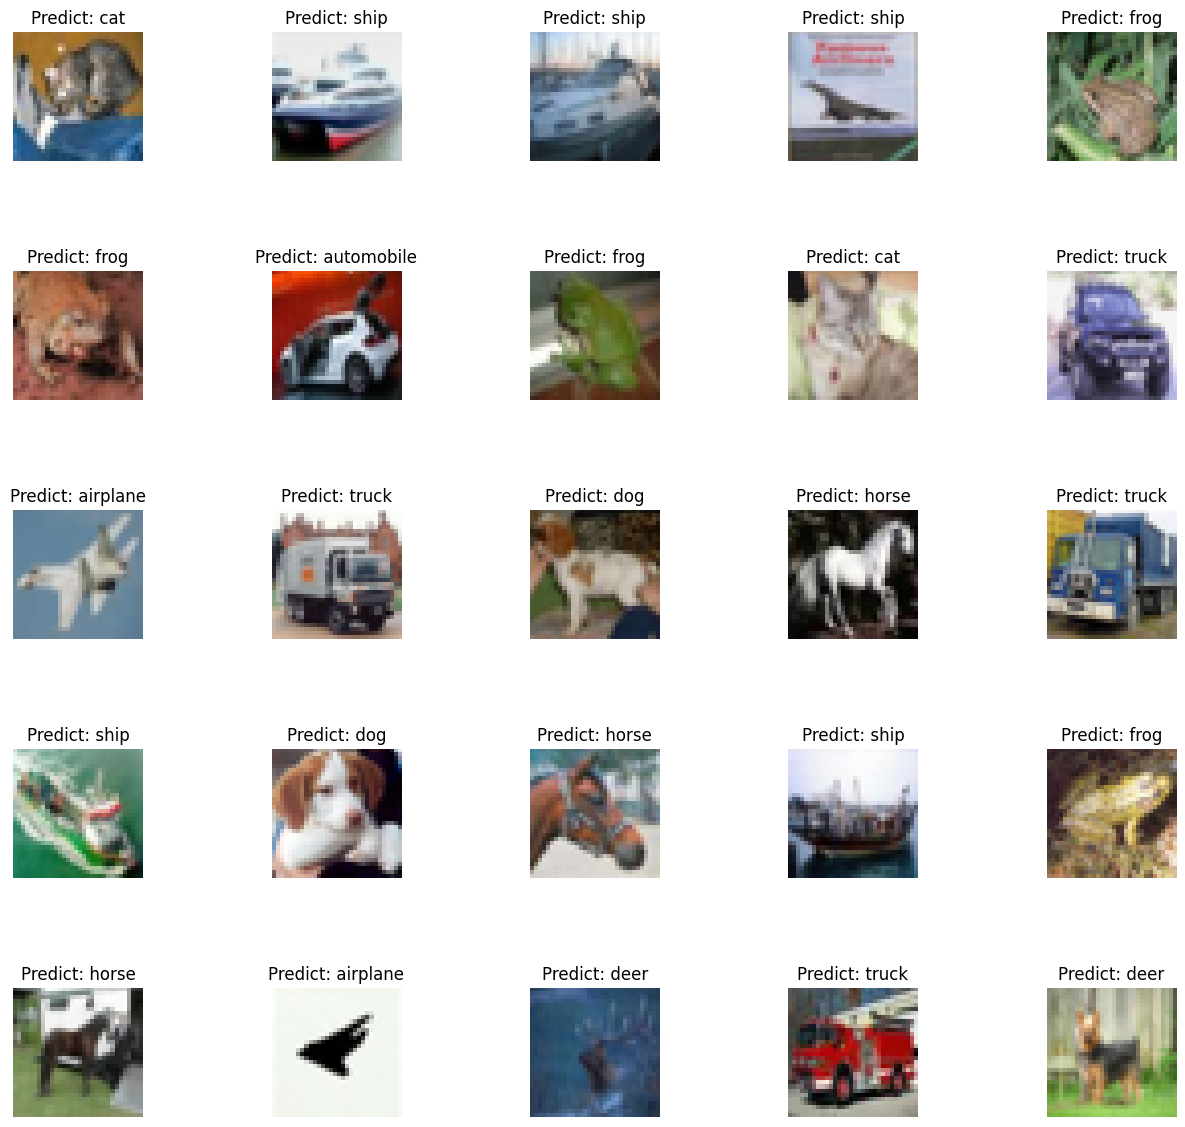

In [59]:
# Plotting the Actual vs. Predicted results

fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(test_X[i])
    axes[i].set_title("Predict: %s" % (class_names[pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

# Model Evaluation

From the above model we can see that the Model-3 performance is comparitvely higher than the Baseline model and Model-2

Accuracy score vs loss score for the above three models

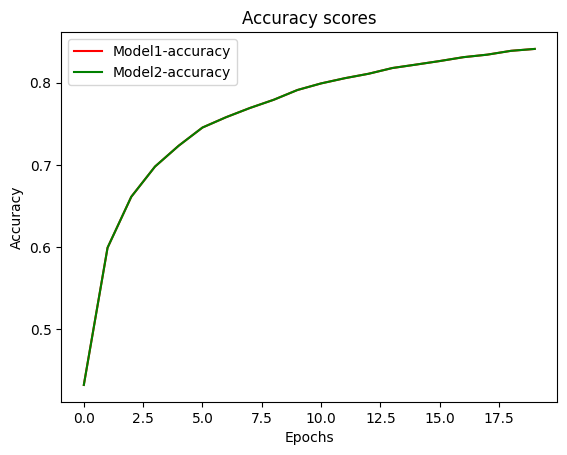

In [63]:
model1accuracy=historyModel1.history['accuracy']
#model2=model2.histrory['accuracy]
model3accuracy=history.history['accuracy']
Epochs=range(0,20)
plt.plot(Epochs,model1accuracy,'red',label='Model1-accuracy')
plt.plot(Epochs,model3accuracy,'green',label='Model2-accuracy')
plt.title('Accuracy scores')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

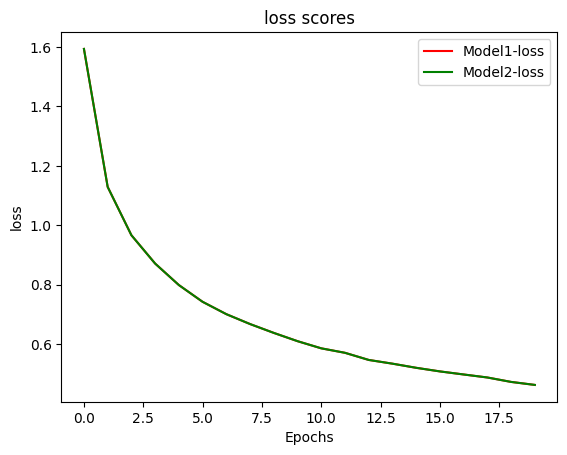

In [65]:
model1accuracy=historyModel1.history['loss']
#model2=model2.histrory['accuracy]
model3accuracy=history.history['loss']
Epochs=range(0,20)
plt.plot(Epochs,model1accuracy,'red',label='Model1-loss')
plt.plot(Epochs,model3accuracy,'green',label='Model2-loss')
plt.title('loss scores')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

Accuracy of the Model-3 is equals to 84% which higher than the rest of the models